In [ ]:
!pip install scikit-surprise

In [5]:
import numpy as np
import pandas as pd

from surprise import BaselineOnly 
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split


In [15]:
data = Dataset.load_builtin('ml-100k')

In [17]:
data.raw_ratings[:10]

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013')]

In [10]:
trainset, testset = train_test_split(data, test_size=0.25)

In [14]:
trainset

In [11]:
algo = KNNWithMeans()

In [12]:
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [18]:
from surprise import Reader
import pandas as pd

In [21]:
df = pd.read_csv('ml-100k.zip')
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [25]:
reader = Reader(rating_scale=(1, 5))

In [23]:
col = ['user_id', 'item_id', 'rating']
df = df[col]

In [26]:
data = Dataset.load_from_df(df, reader)

In [29]:
data.raw_ratings[:5]

[(196, 242, 3.0, None),
 (186, 302, 3.0, None),
 (22, 377, 1.0, None),
 (244, 51, 2.0, None),
 (166, 346, 1.0, None)]

In [30]:
from surprise.model_selection import train_test_split

In [31]:
trainset, testset = train_test_split(data, test_size=0.25)

In [32]:
algo = KNNWithMeans()
algo.fit(trainset)



Computing the msd similarity matrix...
Done computing similarity matrix.


In [33]:
predictions = algo.test(testset)


In [34]:
accuracy.rmse(predictions)

RMSE: 0.9543


0.9543248895229686

Estimating biases using als...
RMSE: 0.9451
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9519
RMSE: 0.9417
RMSE: 0.9228


array([0.92284637, 0.94168074, 0.94513444, 0.95191139])

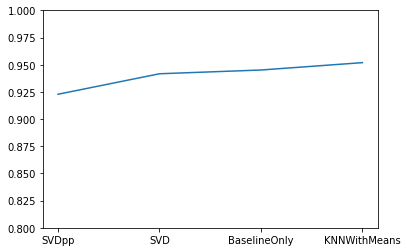

In [35]:

import numpy as np
import pandas as pd

from surprise import BaselineOnly 
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split


data = Dataset.load_builtin('ml-100k')

trainset, testset = train_test_split(data, test_size=0.25)



algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]
names = []
results = []
for option in algorithms:
    algo = option()
    names.append(option.__name__)
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
names = np.array(names)
results = np.array(results)


import matplotlib.pyplot as plt

index = np.argsort(results)
plt.ylim(0.8, 1)
plt.plot(names[index], results[index])
results[index]


In [36]:

import numpy as np
import pandas as pd

from surprise import BaselineOnly 
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split


data = Dataset.load_builtin('ml-100k')

trainset, testset = train_test_split(data, test_size=0.25)


sim_options = {'name': 'pearson_baseline',
               'user_based': True}
algo = KNNWithMeans(k=30, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9453


0.9452568199843032

In [37]:

import numpy as np
import pandas as pd

from surprise import BaselineOnly 
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split


data = Dataset.load_builtin('ml-100k')

trainset, testset = train_test_split(data, test_size=0.25)


result = []
for neighbor_size in (10, 20, 30, 40, 50, 60):
    algo = KNNWithMeans(k=neighbor_size, sim_options={'name':
           'pearson_baseline', 'user_based': True})
    algo.fit(trainset)
    predictions = algo.test(testset)
    result.append([neighbor_size, accuracy.rmse(predictions)])
result

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9608
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9479
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9453
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9452
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9454
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9457


[[10, 0.9608028282618343],
 [20, 0.9479251470962388],
 [30, 0.9453345172390087],
 [40, 0.9451812581715153],
 [50, 0.945411482068266],
 [60, 0.9457343453567972]]

In [39]:
import numpy as np
import pandas as pd

from surprise import BaselineOnly 
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split


data = Dataset.load_builtin('ml-100k')


from surprise.model_selection import GridSearchCV


param_grid = {'k': [5, 10, 15, 25],
              'sim_options': {'name': ['pearson_baseline', 'cosine'],
                              'user_based': [True, False]}
              }

# cv (cross validation) = 4 -> split 4 data set (4 times)
# all combinations are compared in CV way
# 
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=4)
gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similar

In [40]:
print(gs.best_score['rmse'])  # best RMSE
print(gs.best_params['rmse']) # best parameters

0.9255660914012398
{'k': 25, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [41]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [70, 80, 90],
              'lr_all': [0.005, 0.006, 0.007],
              'reg_all': [0.05, 0.07, 0.1]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=4)
gs.fit(data)

In [42]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])


0.912313469159006
{'n_epochs': 90, 'lr_all': 0.006, 'reg_all': 0.1}


In [43]:
## Keras MF


In [47]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 6.6 MB/s 


## Keras MF

In [44]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle


r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('u.data', names=r_cols,  sep='\t',encoding='latin-1')
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)


TRAIN_SIZE = 0.75
ratings = shuffle(ratings)
cutoff = int(TRAIN_SIZE * len(ratings))
ratings_train = ratings.iloc[:cutoff]
ratings_test = ratings.iloc[cutoff:]

In [48]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adamax

In [49]:
K = 200                             # Number of Latent factors
mu = ratings_train.rating.mean()    # overall average
M = ratings.user_id.max() + 1       # Number of users
N = ratings.movie_id.max() + 1      # Number of movies

In [50]:
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [51]:
M, N


(944, 1683)

In [55]:
user = Input(shape=(1, ))   
item = Input(shape=(1, )) 
P_embedding = Embedding(M, K, embeddings_regularizer=l2())(user)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2())(item)
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user)
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)

In [57]:
R = layers.dot([P_embedding, Q_embedding], axes=2)
R = layers.add([R, user_bias, item_bias])
R = Flatten()(R)    

In [58]:
model = Model(inputs=[user, item], outputs=R)

In [59]:
model.compile(
  loss=RMSE,
  optimizer=SGD(),
  #optimizer=Adamax(),
  metrics=[RMSE]
)

In [60]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 200)       188800      ['input_2[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 200)       336600      ['input_3[0][0]']                
                                                                                              

In [61]:
ratings_train

,user_id,movie_id,rating
55933,716,423,4
15169,216,234,4
63449,168,458,1
38726,551,1079,1
44931,614,717,4
...,...,...,...
36423,393,29,4
45975,407,223,4
45053,217,172,1
82196,37,233,4


In [62]:
ratings_train.user_id.values

array([716, 216, 168, ..., 217,  37, 321])

In [64]:
ratings_train['user_id'].values

array([716, 216, 168, ..., 217,  37, 321])

In [65]:
P_embedding

<KerasTensor: shape=(None, 1, 200) dtype=float32 (created by layer 'embedding')>

In [66]:
result = model.fit(
  x=[ratings_train.user_id.values, ratings_train.movie_id.values],
  y=ratings_train.rating.values - mu,
  epochs=60,
  batch_size=256,
  validation_data=(
    [ratings_test.user_id.values, ratings_test.movie_id.values],
    ratings_test.rating.values - mu
  )
)

Epoch 1/60
293/293 [==============================] - 8s 17ms/step - loss: 5.2797 - RMSE: 1.1249 - val_loss: 5.0322 - val_RMSE: 1.1170
Epoch 2/60
293/293 [==============================] - 4s 12ms/step - loss: 4.8183 - RMSE: 1.1229 - val_loss: 4.5975 - val_RMSE: 1.1152
Epoch 3/60
293/293 [==============================] - 2s 7ms/step - loss: 4.4079 - RMSE: 1.1210 - val_loss: 4.2110 - val_RMSE: 1.1136
Epoch 4/60
293/293 [==============================] - 2s 7ms/step - loss: 4.0430 - RMSE: 1.1193 - val_loss: 3.8673 - val_RMSE: 1.1121
Epoch 5/60
293/293 [==============================] - 2s 7ms/step - loss: 3.7187 - RMSE: 1.1180 - val_loss: 3.5616 - val_RMSE: 1.1107
Epoch 6/60
293/293 [==============================] - 2s 7ms/step - loss: 3.4300 - RMSE: 1.1165 - val_loss: 3.2897 - val_RMSE: 1.1094
Epoch 7/60
293/293 [==============================] - 2s 7ms/step - loss: 3.1735 - RMSE: 1.1153 - val_loss: 3.0480 - val_RMSE: 1.1082
Epoch 8/60
293/293 [==============================] - 2s 7ms

In [67]:
import matplotlib.pyplot as plt

In [68]:
result.history['RMSE']

[1.124876618385315,
 1.1229034662246704,
 1.121014952659607,
 1.1193400621414185,
 1.1179687976837158,
 1.1164882183074951,
 1.1152739524841309,
 1.1140861511230469,
 1.1129412651062012,
 1.1116822957992554,
 1.1109122037887573,
 1.1100480556488037,
 1.1090251207351685,
 1.108312726020813,
 1.1076431274414062,
 1.106950283050537,
 1.106176733970642,
 1.1056345701217651,
 1.10513436794281,
 1.1046513319015503,
 1.1040472984313965,
 1.1037049293518066,
 1.1032354831695557,
 1.102835774421692,
 1.1024531126022339,
 1.1021482944488525,
 1.1018065214157104,
 1.1015386581420898,
 1.101220965385437,
 1.100833773612976,
 1.1007888317108154,
 1.1003954410552979,
 1.1002832651138306,
 1.1000723838806152,
 1.0997819900512695,
 1.099776029586792,
 1.0996371507644653,
 1.0993603467941284,
 1.0992008447647095,
 1.0991605520248413,
 1.0989794731140137,
 1.0987825393676758,
 1.0988085269927979,
 1.0987818241119385,
 1.0984435081481934,
 1.0984151363372803,
 1.0983198881149292,
 1.0983549356460571,
 1.

In [69]:
result.history['val_RMSE'][:5]

[1.1169780492782593,
 1.1152271032333374,
 1.1136056184768677,
 1.1121008396148682,
 1.1107063293457031]

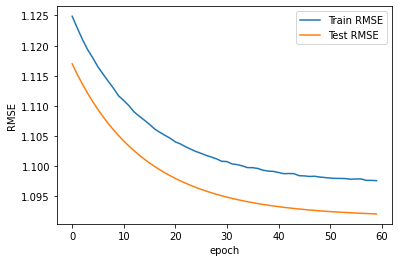

In [70]:
plt.plot(result.history['RMSE'], label="Train RMSE")
plt.plot(result.history['val_RMSE'], label="Test RMSE")
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [71]:
user_ids = ratings_test.user_id.values[0:6]
movie_ids = ratings_test.movie_id.values[0:6]
predictions = model.predict([user_ids, movie_ids]) + mu
print("Actuals: \n", ratings_test[0:6])
print( )
print("Predictions: \n", predictions)

Actuals: 
        user_id  movie_id  rating
79619      886        20       2
85309      893      1012       3
52069      707      1007       4
99577      590       676       4
78216      896        27       1
58896      758       529       4

Predictions: 
 [[3.510834 ]
 [3.5274408]
 [3.532464 ]
 [3.5137413]
 [3.4406579]
 [3.5852284]]


In [72]:
def RMSE2(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

In [73]:
user_ids = ratings_test.user_id.values
movie_ids = ratings_test.movie_id.values
y_pred = model.predict([user_ids, movie_ids]) + mu

In [74]:
y_pred

array([[3.510834 ],
       [3.5274408],
       [3.532464 ],
       ...,
       [3.5406241],
       [3.5746534],
       [3.5395086]], dtype=float32)

In [75]:
np.ravel(y_pred, order='C')

array([3.510834 , 3.5274408, 3.532464 , ..., 3.5406241, 3.5746534,
       3.5395086], dtype=float32)

In [77]:
y_pred = np.ravel(y_pred, order='C')
y_true = np.array(ratings_test.rating)

In [78]:
RMSE2(y_true, y_pred)

1.0928696442185122

In [79]:
import pandas as pd
import numpy as np


r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('u.data', names=r_cols,  sep='\t',encoding='latin-1')
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)

In [80]:
from sklearn.utils import shuffle

TRAIN_SIZE = 0.75
ratings = shuffle(ratings)
cutoff = int(TRAIN_SIZE * len(ratings))
ratings_train = ratings.iloc[:cutoff]
ratings_test = ratings.iloc[cutoff:]

In [81]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras.layers import Dense, Concatenate, Activation

In [82]:
K = 200                             # Number of Latent factors
mu = ratings_train.rating.mean()    # overall average
M = ratings.user_id.max() + 1       # Number of users
N = ratings.movie_id.max() + 1      # Number of movies

In [83]:
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [84]:
user = Input(shape=(1, ))                                               # User input
item = Input(shape=(1, ))                                               # Item input
P_embedding = Embedding(M, K, embeddings_regularizer=l2())(user)        # (M, 1, K)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2())(item)        # (N, 1, K)
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user)          # User bias term (M, 1, )
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)          # Item bias term (N, 1, )

In [85]:
# Concatenate layers
P_embedding = Flatten()(P_embedding)                                    # (K, )
Q_embedding = Flatten()(Q_embedding)                                    # (K, )
user_bias = Flatten()(user_bias)                                        # (1, )
item_bias = Flatten()(item_bias)                                        # (1, )
R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias])     # (2K + 2, )

In [86]:
# Neural network
R = Dense(2048)(R)
R = Activation('linear')(R)
R = Dense(256)(R)
R = Activation('linear')(R)
R = Dense(1)(R)

In [87]:
model = Model(inputs=[user, item], outputs=R)

In [88]:
model.compile(
  loss=RMSE,
  optimizer=SGD(),
  #optimizer=Adamax(),
  metrics=[RMSE]
)

In [89]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 1, 200)       188800      ['input_4[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 1, 200)       336600      ['input_5[0][0]']                
                                                                                            

In [90]:
result = model.fit(
  x=[ratings_train.user_id.values, ratings_train.movie_id.values],
  y=ratings_train.rating.values - mu,
  epochs=65,
  batch_size=512,
  validation_data=(
    [ratings_test.user_id.values, ratings_test.movie_id.values],
    ratings_test.rating.values - mu
  )
)

Epoch 1/65
147/147 [==============================] - 29s 169ms/step - loss: 5.3983 - RMSE: 1.1253 - val_loss: 5.2687 - val_RMSE: 1.1211
Epoch 2/65
147/147 [==============================] - 15s 102ms/step - loss: 5.1526 - RMSE: 1.1236 - val_loss: 5.0303 - val_RMSE: 1.1195
Epoch 3/65
147/147 [==============================] - 14s 93ms/step - loss: 4.9209 - RMSE: 1.1214 - val_loss: 4.8054 - val_RMSE: 1.1177
Epoch 4/65
147/147 [==============================] - 14s 95ms/step - loss: 4.7024 - RMSE: 1.1203 - val_loss: 4.5934 - val_RMSE: 1.1162
Epoch 5/65
147/147 [==============================] - 14s 94ms/step - loss: 4.4964 - RMSE: 1.1188 - val_loss: 4.3933 - val_RMSE: 1.1144
Epoch 6/65
147/147 [==============================] - 14s 95ms/step - loss: 4.3019 - RMSE: 1.1166 - val_loss: 4.2045 - val_RMSE: 1.1127
Epoch 7/65
147/147 [==============================] - 14s 94ms/step - loss: 4.1184 - RMSE: 1.1151 - val_loss: 4.0264 - val_RMSE: 1.1108
Epoch 8/65
147/147 [==========================

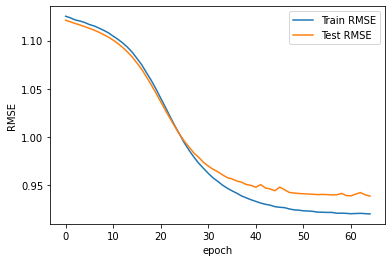

In [91]:
import matplotlib.pyplot as plt

plt.plot(result.history['RMSE'], label="Train RMSE")
plt.plot(result.history['val_RMSE'], label="Test RMSE")
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [92]:
user_ids = ratings_test.user_id.values[0:6]
movie_ids = ratings_test.movie_id.values[0:6]
predictions = model.predict([user_ids, movie_ids]) + mu
print("Actuals: \n", ratings_test[0:6])
print()
print("Predictions: \n", predictions)

Actuals: 
        user_id  movie_id  rating
40909      244      1109       4
84316      940        47       3
22727      418       315       2
71436      588       222       3
35264        3       317       2
52608      747       939       3

Predictions: 
 [[3.48442  ]
 [3.4695468]
 [3.4583547]
 [3.9048717]
 [3.4930146]
 [3.984242 ]]


In [93]:
def RMSE2(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

In [94]:
user_ids = ratings_test.user_id.values
movie_ids = ratings_test.movie_id.values
y_pred = model.predict([user_ids, movie_ids]) + mu
y_pred = np.ravel(y_pred, order='C')
y_true = np.array(ratings_test.rating)

In [95]:
RMSE2(y_true, y_pred)

0.9392017711785902

In [237]:

import pandas as pd
import numpy as np


r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('u.data', names=r_cols,  sep='\t',encoding='latin-1')
ratings = ratings[['user_id', 'movie_id', 'rating']].astype(int)

In [238]:

from sklearn.utils import shuffle

In [239]:
TRAIN_SIZE = 0.75
ratings = shuffle(ratings)
cutoff = int(TRAIN_SIZE * len(ratings))
ratings_train = ratings.iloc[:cutoff]
ratings_test = ratings.iloc[cutoff:]

In [240]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols, encoding='latin-1')

In [167]:
users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [241]:
users = users[['user_id', 'occupation', 'age']]

In [242]:
occupation = {}
def convert_occ(x):
    if x in occupation:
        return occupation[x]
    else:
        occupation[x] = len(occupation)
        return occupation[x]

In [243]:
users['occupation'] = users['occupation'].apply(convert_occ)

In [244]:
users['occupation']

0       0
1       1
2       2
3       0
4       1
       ..
938     5
939     4
940     5
941    11
942     5
Name: occupation, Length: 943, dtype: int64

In [245]:
def convert_age(p):
  return int(p)

In [246]:
users['age'] = users['age'].apply(convert_age)

age_num = len(set(users['age']))
age_num
A = max(users['age'])

In [247]:
type(users['age'][0])

numpy.int64

In [248]:
L = len(occupation)
train_occ = pd.merge(ratings_train, users, on='user_id')['occupation']
test_occ = pd.merge(ratings_test, users, on='user_id')['occupation']

In [151]:
L

21

In [249]:
train_age = pd.merge(ratings_train, users, on='user_id')['age']
test_age = pd.merge(ratings_test, users, on='user_id')['age']

In [176]:
train_age

0        29
1        29
2        29
3        29
4        29
         ..
74995    39
74996    39
74997    39
74998    39
74999    39
Name: age, Length: 75000, dtype: int64

In [250]:
pd.merge(ratings_train, users, on='user_id')

,user_id,movie_id,rating,occupation,age
0,704,354,4,11,51
1,704,135,5,11,51
2,704,191,3,11,51
3,704,187,4,11,51
4,704,611,3,11,51
...,...,...,...,...,...
74995,856,307,4,15,43
74996,856,347,2,15,43
74997,856,879,3,15,43
74998,856,748,3,15,43


In [106]:
train_occ

0        1
1        1
2        1
3        1
4        1
        ..
74995    5
74996    5
74997    5
74998    5
74999    5
Name: occupation, Length: 75000, dtype: int64

In [107]:
ratings_train

,user_id,movie_id,rating
16786,373,1006,2
12209,250,477,3
85368,230,423,5
20519,174,1074,4
95811,733,100,5
...,...,...,...
3004,262,77,2
37357,591,56,4
93291,798,1509,3
29515,494,126,4


In [177]:
users

,user_id,occupation,age
0,1,0,24
1,2,1,53
2,3,2,23
3,4,0,24
4,5,1,33
...,...,...,...
938,939,5,26
939,940,4,32
940,941,5,20
941,942,11,48


In [251]:
pd.merge(ratings_train, users, on='user_id')

,user_id,movie_id,rating,occupation,age
0,704,354,4,11,51
1,704,135,5,11,51
2,704,191,3,11,51
3,704,187,4,11,51
4,704,611,3,11,51
...,...,...,...,...,...
74995,856,307,4,15,43
74996,856,347,2,15,43
74997,856,879,3,15,43
74998,856,748,3,15,43


In [252]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, Adamax

In [253]:
K = 200                             # Number of Latent factors
mu = ratings_train.rating.mean()    # overall average
M = ratings.user_id.max() + 1       # Number of users
N = ratings.movie_id.max() + 1      # Number of movies

In [254]:
mu

3.5315333333333334

In [255]:
def RMSE(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [256]:
user = Input(shape=(1, ))
item = Input(shape=(1, ))
P_embedding = Embedding(M, K, embeddings_regularizer=l2())(user)
Q_embedding = Embedding(N, K, embeddings_regularizer=l2())(item)
user_bias = Embedding(M, 1, embeddings_regularizer=l2())(user)
item_bias = Embedding(N, 1, embeddings_regularizer=l2())(item)

In [261]:
from tensorflow.keras.layers import Dense, Concatenate, Activation

P_embedding = Flatten()(P_embedding)
Q_embedding = Flatten()(Q_embedding)
user_bias = Flatten()(user_bias)
item_bias = Flatten()(item_bias)

In [262]:
occ = Input(shape=(1, ))
occ_embedding = Embedding(L, 3, embeddings_regularizer=l2())(occ)
occ_layer = Flatten()(occ_embedding)

age = Input(shape=(1, ))
#age_embedding = Embedding(A, 3, embeddings_regularizer=l2())(age)
age_layer = Flatten()(age)


R = Concatenate()([P_embedding, Q_embedding, user_bias, item_bias, occ_layer])

In [224]:
occ_layer.shape

TensorShape([None, 3])

In [225]:
age_layer.shape


TensorShape([None, 3])

In [263]:
R = Dense(2048)(R)
R = Activation('linear')(R)

R = Concatenate()([R, age_layer])


R = Dense(256)(R)
R = Activation('linear')(R)
R = Dense(1)(R)

In [264]:
model = Model(inputs=[user, item, occ, age], outputs=R)

AttributeError: ignored

In [265]:
model.compile(
  loss=RMSE,
  optimizer=SGD(),
  #optimizer=Adamax(),
  metrics=[RMSE]
)

In [266]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_35 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_36 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_45 (Embedding)       (None, 1, 200)       188800      ['input_35[0][0]']               
                                                                                                  
 embedding_46 (Embedding)       (None, 1, 200)       336600      ['input_36[0][0]']               
                                                                                           

In [191]:
len(ratings_test.movie_id.values)

25000

In [192]:
ratings_test.user_id.values.shape

(25000,)

In [193]:
train_occ.values.shape

(75000,)

In [194]:
train_age.values.shape

(75000,)

In [267]:
result = model.fit(
  x=[ratings_train.user_id.values, ratings_train.movie_id.values, train_occ.values, train_age.values],
  y=ratings_train.rating.values - mu,
  epochs=65,
  batch_size=512,
  validation_data=(
    [ratings_test.user_id.values, ratings_test.movie_id.values, test_occ.values, test_age.values],
    ratings_test.rating.values - mu
  )
)

Epoch 1/65
147/147 [==============================] - 15s 96ms/step - loss: 5.9894 - RMSE: 1.7105 - val_loss: 5.2778 - val_RMSE: 1.1269
Epoch 2/65
147/147 [==============================] - 14s 94ms/step - loss: 5.1610 - RMSE: 1.1284 - val_loss: 5.0469 - val_RMSE: 1.1330
Epoch 3/65
147/147 [==============================] - 14s 94ms/step - loss: 4.9284 - RMSE: 1.1262 - val_loss: 4.8156 - val_RMSE: 1.1253
Epoch 4/65
147/147 [==============================] - 14s 94ms/step - loss: 4.7115 - RMSE: 1.1266 - val_loss: 4.6048 - val_RMSE: 1.1252
Epoch 5/65
147/147 [==============================] - 14s 94ms/step - loss: 4.5068 - RMSE: 1.1262 - val_loss: 4.4088 - val_RMSE: 1.1279
Epoch 6/65
147/147 [==============================] - 14s 95ms/step - loss: 4.3130 - RMSE: 1.1255 - val_loss: 4.2208 - val_RMSE: 1.1273
Epoch 7/65
147/147 [==============================] - 14s 94ms/step - loss: 4.1311 - RMSE: 1.1259 - val_loss: 4.0449 - val_RMSE: 1.1280
Epoch 8/65
147/147 [============================

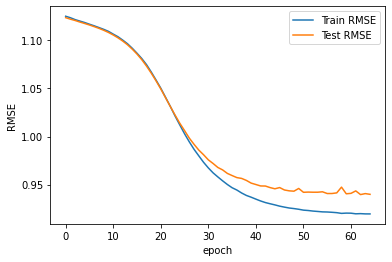

In [121]:
import matplotlib.pyplot as plt

plt.plot(result.history['RMSE'], label="Train RMSE")
plt.plot(result.history['val_RMSE'], label="Test RMSE")
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [122]:
user_ids = ratings_test.user_id.values[0:6]
movie_ids = ratings_test.movie_id.values[0:6]
user_occ = test_occ[0:6]
predictions = model.predict([user_ids, movie_ids, user_occ]) + mu
print("Actuals: \n", ratings_test[0:6])
print()
print("Predictions: \n", predictions)

Actuals: 
        user_id  movie_id  rating
11175      187        86       4
56809      405       943       1
34143      458       127       5
44862      466       258       4
98218      178      1119       4
1512       285       151       5

Predictions: 
 [[4.1471853]
 [2.1079712]
 [4.2753935]
 [3.6935692]
 [3.6987267]
 [3.7710893]]


In [123]:
def RMSE2(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

In [124]:
user_ids = ratings_test.user_id.values
movie_ids = ratings_test.movie_id.values
y_pred = model.predict([user_ids, movie_ids, test_occ]) + mu
y_pred = np.ravel(y_pred, order='C')
y_true = np.array(ratings_test.rating)

In [125]:
RMSE2(y_true, y_pred)

0.9404383536695796